<a href="https://colab.research.google.com/github/jonahcoutinho/Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

<Figure size 432x288 with 0 Axes>

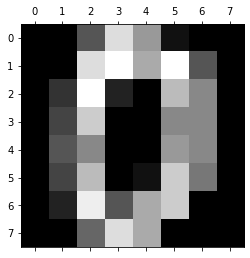

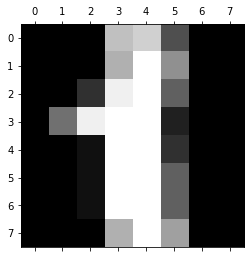

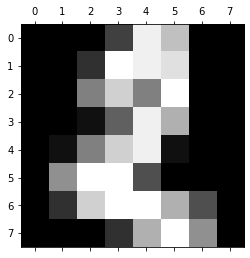

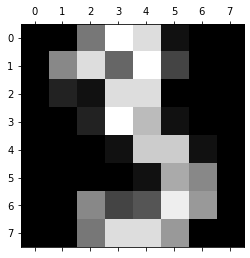

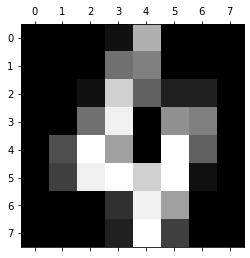

In [7]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [9]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
df=pd.DataFrame(digits.data)
df['target']=digits.target
df

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.2)

In [22]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
param={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'n_estimators': [10,20,30,40,50,60,100,200],
 'criterion':['gini', 'entropy']} 
grid=GridSearchCV(model,param,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'n_estimators': 200}

YES it takes Time!!

In [23]:
model=RandomForestClassifier(bootstrap=False,criterion='gini',n_estimators=200,max_depth=40)
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred=model.predict(xtest)
cm=confusion_matrix(pred,ytest)

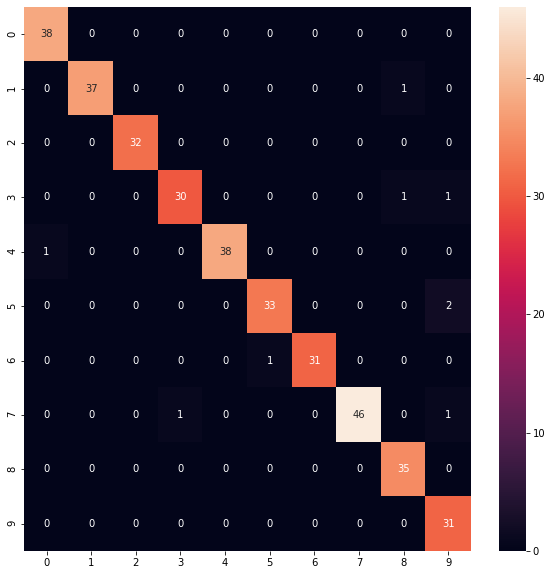

In [26]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [27]:
model.score(xtest,ytest)

0.975